# <u><h1><center>DEUXIEME PARTIE : ANALYSE </center></h1>

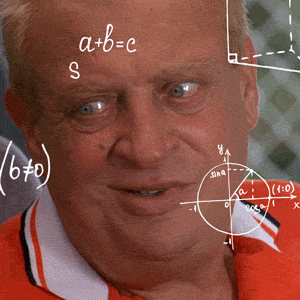

# <u>Indicateurs et graphiques autour du chiffre d'affaires

**Les premières demandes d'Antoine** portaient tout d'abord sur la **création d'indicateurs et de graphiques autour du chiffre d'affaires**.
Commençons doucement, par une petite mise en jambe, un échauffement. Interressons nous tout d'abord au **Chiffre d'affaires total**, celui dégagé par la société depuis la création du site internet.
Pour ce faire on va utilisé la méthode **.sum() ainsi que la fonction round()**.

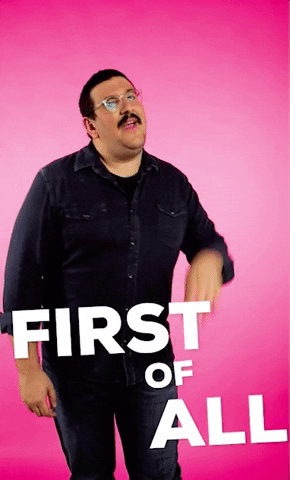

**"First of all"**, avant tout, on ne va garder que **les lignes qui correspondent à une réelle transaction** dans notre tableau final. 
Il faut se rappeler que ce dernier comporte des lignes avec **des clients non-acheteurs et des produits " non-achetés"**. Les garder compliquerait les choses. On pourrait les garder et les exclure du spectre de nos calculs, mais ça n'aurait que pour effet **d'alourdir et complexifier notre code.** 
On va donc la méthode **.dropna()** pour se débarasser des lignes dont on a parlé. On appelera ce nouveau df, **reelles_transactions**.

In [64]:
reelles_transactions = jointure_finale.dropna()
reelles_transactions.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   sex         679332 non-null  category      
 5   birth       679332 non-null  float64       
 6   price       679332 non-null  float64       
 7   categ       679332 non-null  float64       
dtypes: category(1), datetime64[ns](1), float64(3), object(3)
memory usage: 42.1+ MB


In [65]:
round(reelles_transactions.loc[(reelles_transactions["client_id"] != "NaN"),"price"].sum())

11855936

Le CA total est de **11.855.936,00 €**

Deuxième interrogation à laquelle on pourrait répondre :
 **Combien de vente ont été réalisée depuis la création du site internet ?**
Pour cela rien de plus simple, on a juste à **compter les session_id** du df **jointure_finale** avec la méthode **.count().**

In [66]:
reelles_transactions["session_id"].count()

679332

Le nombre de vente réalisée depuis la création du site est de **679.332 .**
Enregistrons ces valeurs dans des variables et passons à la suite .

In [67]:
Chiffre_affaires_total = round(reelles_transactions.loc[(reelles_transactions["client_id"] != "NaN"),"price"].sum())
nb_total_ventes = reelles_transactions["session_id"].count()

# <u>Evolution du CA dans le temps 

On peut répondre à la question de **l'évolution du CA dans le temps** de différentes façons. La première serait d'y répondre en essayant de savoir quelle a été **l'année la plus fructueuse**. Pour ce faire il suffirait **de grouper les chiffre d'affaire par année grace à l'association des méthodes .groupby() et .sum()**.
Mais avant de pourvoir le faire il faudra créer un colonne **"année"**, ce dont le df **jointure_finale** est dépourvu.

In [68]:
reelles_transactions["year"] = reelles_transactions["date"].dt.year
reelles_transactions["month"] = reelles_transactions["date"].dt.month
reelles_transactions["day"] = reelles_transactions["date"].dt.day

<ipython-input-68-8775a8241fa8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reelles_transactions["year"] = reelles_transactions["date"].dt.year


**Vérifions** que les colonnes ont bien été créées

In [70]:
reelles_transactions.head()

id_prod                       date session_id client_id sex   birth  price  \
0  0_1259 2021-03-01 00:01:07.843138        s_1     c_329   f 1967.00  11.99   
1  0_1259 2022-10-01 00:01:07.843138   s_275943     c_329   f 1967.00  11.99   
2  0_1259 2022-12-01 00:01:07.843138   s_305291     c_329   f 1967.00  11.99   
3  0_1259 2023-01-01 00:01:07.843138   s_320153     c_329   f 1967.00  11.99   
4  0_1259 2021-03-04 07:26:01.343183     s_1519    c_1609   m 1980.00  11.99   

   categ  year  month  day  
0   0.00  2021      3    1  
1   0.00  2022     10    1  
2   0.00  2022     12    1  
3   0.00  2023      1    1  
4   0.00  2021      3    4

In [71]:
reelles_transactions=reelles_transactions.sort_values('date')

**Parfait !** La colonne apparait ! Passons maintenant au chiffre d'affaire annuel, que l'on sauvegarderas dans une variable **ca_par_année** .

In [72]:
ca_par_année = reelles_transactions.groupby(["year"])["price"].sum()
ca_par_année= ca_par_année.to_frame(name="CA par année").reset_index()
ca_par_année

year  CA par année
0  2021    4771695.69
1  2022    6109880.61
2  2023     974360.17

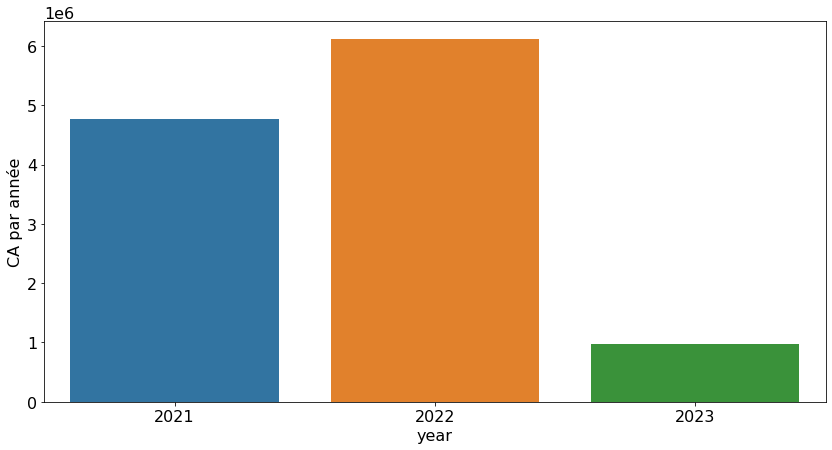

In [73]:
sns.barplot(data=ca_par_année, x="year", y="CA par année")
plt.show()

On peut voir que **l'année 2022 est notre année la plus fructueuse.** L'année **2023 est quant à elle celle pendant laquelle nous avons enregistré le moins de gain, et de très loin**, il semblerait que le Chiffre d'affaire annuel passe de **PLUS DE 6 millions d'euros** à moins d'un million. Essayons de savoir **pourquoi** .
Première hypothèse : **L'année 2023 n'est tout simplement pas terminée**. Essayons grace à la méthode **.nlargest** de savoir quelle est la **date la plus tardive** de notre dataframe.

In [74]:
reelles_transactions["date"].nlargest(1)

250493   2023-02-28 23:58:30.792755
Name: date, dtype: datetime64[ns]

**Bingo !** Nous n'avons de données que pour l'année 2023 que jusqu'à la **fin du mois de fevrier** ce qui explique qu'on ne soit qu'à un million de chiffre d'affaire.